In [1]:
from tensorflow.keras.datasets import mnist # mnist 데이터 셋
import tensorflow.keras.utils as utils # 원핫인코딩
import pandas as pd # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(3)

## 1. 손글씨데이터

In [2]:
# 1. 데이터 셋 준비하기
# 훈련셋, 테스트셋 분리
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
for row in X_train[0]:
    for pixel in row:
        print("{:3d}".format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

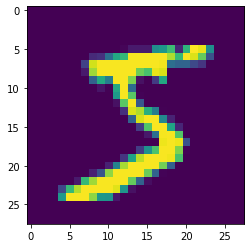

In [4]:
plt.imshow(X_train[0])

In [5]:
Y_train[0]

5

In [6]:
# 훈련셋(6만개)에서 훈련셋(5만개)과 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [7]:
# 정수 -> 실수형 변환 -> normalize하기(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000,784).astype('float32') / 255.0
X_test = X_test.reshape(10000,784).astype('float32') / 255.0

In [8]:
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs = np.random.choice(10000,300)
X_train=X_train[train_rand_idxs]
Y_train=Y_train[train_rand_idxs]
X_val=X_val[val_rand_idxs]
Y_val=Y_val[val_rand_idxs]

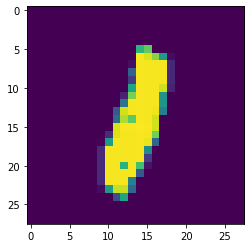

In [9]:
plt.imshow(X_train[0].reshape(28,28))

In [10]:
Y_train[0]

1

In [11]:
# 원핫인코딩 방법1
sampledata = np.array([1,2,3])
#pd.get_dummies(sampledata).to_numpy()
pd.get_dummies(sampledata).values

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [12]:
# 원핫인코딩 방법2
utils.to_categorical(sampledata)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [13]:
# 원핫인코딩 - 라벨링 전환
# 1 -> 0 1 0 0 0 0 0 0
# 5 -> 0 0 0 0 0 1 0 0
Y_train=utils.to_categorical(Y_train)
Y_val=utils.to_categorical(Y_val)
Y_test=utils.to_categorical(Y_test)

In [34]:
print(Y_train[0].argmax())

2


In [35]:
# 모델 구성하기
#from tensorflow.keras.layers import Activation
#relu = Activation('relu')
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=100, validation_data=(X_val, Y_val))

Epoch 1/1000
7/7 [==============================] - 0s 23ms/step - loss: 2.2959 - accuracy: 0.0943 - val_loss: 2.2906 - val_accuracy: 0.1433
Epoch 2/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2926 - accuracy: 0.1257 - val_loss: 2.2880 - val_accuracy: 0.1533
Epoch 3/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2891 - accuracy: 0.1386 - val_loss: 2.2851 - val_accuracy: 0.1467
Epoch 4/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2847 - accuracy: 0.1586 - val_loss: 2.2812 - val_accuracy: 0.1467
Epoch 5/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2798 - accuracy: 0.1543 - val_loss: 2.2757 - val_accuracy: 0.1600
Epoch 6/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2736 - accuracy: 0.1671 - val_loss: 2.2693 - val_accuracy: 0.1833
Epoch 7/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2669 - accuracy: 0.1729 - val_loss: 2.2623 - val_accuracy: 0.1867
Epoch 8/1000
7/7 [=

Epoch 59/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.9411 - accuracy: 0.2914 - val_loss: 1.9718 - val_accuracy: 0.2700
Epoch 60/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.9364 - accuracy: 0.2943 - val_loss: 1.9676 - val_accuracy: 0.2800
Epoch 61/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.9319 - accuracy: 0.3000 - val_loss: 1.9635 - val_accuracy: 0.2867
Epoch 62/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.9273 - accuracy: 0.3029 - val_loss: 1.9595 - val_accuracy: 0.3100
Epoch 63/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.9227 - accuracy: 0.3057 - val_loss: 1.9552 - val_accuracy: 0.3067
Epoch 64/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.9184 - accuracy: 0.3086 - val_loss: 1.9513 - val_accuracy: 0.3133
Epoch 65/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.9140 - accuracy: 0.3114 - val_loss: 1.9474 - val_accuracy: 0.3267
Epoch 66/1000

Epoch 117/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7266 - accuracy: 0.3814 - val_loss: 1.7802 - val_accuracy: 0.3600
Epoch 118/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7235 - accuracy: 0.3871 - val_loss: 1.7775 - val_accuracy: 0.3600
Epoch 119/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7206 - accuracy: 0.3843 - val_loss: 1.7749 - val_accuracy: 0.3600
Epoch 120/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7176 - accuracy: 0.3886 - val_loss: 1.7722 - val_accuracy: 0.3600
Epoch 121/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7144 - accuracy: 0.3900 - val_loss: 1.7696 - val_accuracy: 0.3600
Epoch 122/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7115 - accuracy: 0.3929 - val_loss: 1.7670 - val_accuracy: 0.3600
Epoch 123/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7091 - accuracy: 0.3886 - val_loss: 1.7643 - val_accuracy: 0.3600
Epoch 

Epoch 175/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5740 - accuracy: 0.4229 - val_loss: 1.6479 - val_accuracy: 0.3767
Epoch 176/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5718 - accuracy: 0.4243 - val_loss: 1.6460 - val_accuracy: 0.3767
Epoch 177/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.5701 - accuracy: 0.4257 - val_loss: 1.6444 - val_accuracy: 0.3800
Epoch 178/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5676 - accuracy: 0.4243 - val_loss: 1.6424 - val_accuracy: 0.3767
Epoch 179/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5651 - accuracy: 0.4286 - val_loss: 1.6406 - val_accuracy: 0.3800
Epoch 180/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5629 - accuracy: 0.4271 - val_loss: 1.6390 - val_accuracy: 0.3767
Epoch 181/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5611 - accuracy: 0.4286 - val_loss: 1.6371 - val_accuracy: 0.3800
Epoch 

Epoch 233/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4647 - accuracy: 0.4857 - val_loss: 1.5602 - val_accuracy: 0.4433
Epoch 234/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4630 - accuracy: 0.4814 - val_loss: 1.5590 - val_accuracy: 0.4433
Epoch 235/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4611 - accuracy: 0.4857 - val_loss: 1.5579 - val_accuracy: 0.4433
Epoch 236/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4594 - accuracy: 0.4800 - val_loss: 1.5566 - val_accuracy: 0.4433
Epoch 237/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4583 - accuracy: 0.4829 - val_loss: 1.5552 - val_accuracy: 0.4433
Epoch 238/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4567 - accuracy: 0.4900 - val_loss: 1.5544 - val_accuracy: 0.4467
Epoch 239/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4549 - accuracy: 0.4886 - val_loss: 1.5534 - val_accuracy: 0.4500
Epoch 

Epoch 291/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3831 - accuracy: 0.5100 - val_loss: 1.5030 - val_accuracy: 0.4733
Epoch 292/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3822 - accuracy: 0.5129 - val_loss: 1.5022 - val_accuracy: 0.4733
Epoch 293/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3813 - accuracy: 0.5214 - val_loss: 1.5014 - val_accuracy: 0.4767
Epoch 294/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3793 - accuracy: 0.5157 - val_loss: 1.5007 - val_accuracy: 0.4767
Epoch 295/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3785 - accuracy: 0.5200 - val_loss: 1.5003 - val_accuracy: 0.4767
Epoch 296/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3774 - accuracy: 0.5186 - val_loss: 1.4991 - val_accuracy: 0.4767
Epoch 297/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3759 - accuracy: 0.5229 - val_loss: 1.4985 - val_accuracy: 0.4767
Epoch 

7/7 [==============================] - 0s 4ms/step - loss: 1.3208 - accuracy: 0.5371 - val_loss: 1.4633 - val_accuracy: 0.4867
Epoch 349/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3195 - accuracy: 0.5400 - val_loss: 1.4625 - val_accuracy: 0.4900
Epoch 350/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3187 - accuracy: 0.5371 - val_loss: 1.4614 - val_accuracy: 0.4867
Epoch 351/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3178 - accuracy: 0.5457 - val_loss: 1.4609 - val_accuracy: 0.4900
Epoch 352/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3168 - accuracy: 0.5371 - val_loss: 1.4605 - val_accuracy: 0.4867
Epoch 353/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3155 - accuracy: 0.5429 - val_loss: 1.4599 - val_accuracy: 0.4867
Epoch 354/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3144 - accuracy: 0.5443 - val_loss: 1.4598 - val_accuracy: 0.4900
Epoch 355/1000
7/7 [=

Epoch 463/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2244 - accuracy: 0.5729 - val_loss: 1.4071 - val_accuracy: 0.5033
Epoch 464/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2234 - accuracy: 0.5714 - val_loss: 1.4071 - val_accuracy: 0.5033
Epoch 465/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2228 - accuracy: 0.5700 - val_loss: 1.4063 - val_accuracy: 0.5067
Epoch 466/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2226 - accuracy: 0.5686 - val_loss: 1.4057 - val_accuracy: 0.5067
Epoch 467/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2215 - accuracy: 0.5671 - val_loss: 1.4049 - val_accuracy: 0.5133
Epoch 468/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2207 - accuracy: 0.5714 - val_loss: 1.4043 - val_accuracy: 0.5067
Epoch 469/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2199 - accuracy: 0.5729 - val_loss: 1.4042 - val_accuracy: 0.5067
Epoch 

Epoch 521/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1857 - accuracy: 0.5786 - val_loss: 1.3875 - val_accuracy: 0.5233
Epoch 522/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1847 - accuracy: 0.5800 - val_loss: 1.3871 - val_accuracy: 0.5200
Epoch 523/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1844 - accuracy: 0.5771 - val_loss: 1.3873 - val_accuracy: 0.5200
Epoch 524/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1835 - accuracy: 0.5800 - val_loss: 1.3870 - val_accuracy: 0.5200
Epoch 525/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1838 - accuracy: 0.5729 - val_loss: 1.3867 - val_accuracy: 0.5200
Epoch 526/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1827 - accuracy: 0.5700 - val_loss: 1.3863 - val_accuracy: 0.5200
Epoch 527/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1821 - accuracy: 0.5814 - val_loss: 1.3861 - val_accuracy: 0.5200
Epoch 

Epoch 579/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1524 - accuracy: 0.5800 - val_loss: 1.3735 - val_accuracy: 0.5233
Epoch 580/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1511 - accuracy: 0.5814 - val_loss: 1.3723 - val_accuracy: 0.5267
Epoch 581/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1512 - accuracy: 0.5829 - val_loss: 1.3732 - val_accuracy: 0.5267
Epoch 582/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1504 - accuracy: 0.5843 - val_loss: 1.3723 - val_accuracy: 0.5233
Epoch 583/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1496 - accuracy: 0.5814 - val_loss: 1.3722 - val_accuracy: 0.5233
Epoch 584/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1490 - accuracy: 0.5857 - val_loss: 1.3733 - val_accuracy: 0.5267
Epoch 585/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1483 - accuracy: 0.5786 - val_loss: 1.3727 - val_accuracy: 0.5267
Epoch 

Epoch 637/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1216 - accuracy: 0.5957 - val_loss: 1.3626 - val_accuracy: 0.5267
Epoch 638/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1212 - accuracy: 0.5986 - val_loss: 1.3619 - val_accuracy: 0.5233
Epoch 639/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1207 - accuracy: 0.5914 - val_loss: 1.3624 - val_accuracy: 0.5233
Epoch 640/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1204 - accuracy: 0.5929 - val_loss: 1.3624 - val_accuracy: 0.5233
Epoch 641/1000
7/7 [==============================] - ETA: 0s - loss: 1.0628 - accuracy: 0.65 - 0s 4ms/step - loss: 1.1198 - accuracy: 0.5971 - val_loss: 1.3619 - val_accuracy: 0.5233
Epoch 642/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1193 - accuracy: 0.5929 - val_loss: 1.3610 - val_accuracy: 0.5267
Epoch 643/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1187 - accuracy: 0.5943 - val_

7/7 [==============================] - 0s 4ms/step - loss: 1.0717 - accuracy: 0.6157 - val_loss: 1.3483 - val_accuracy: 0.5433
Epoch 752/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0715 - accuracy: 0.6200 - val_loss: 1.3494 - val_accuracy: 0.5400
Epoch 753/1000
7/7 [==============================] - 0s 5ms/step - loss: 1.0717 - accuracy: 0.6129 - val_loss: 1.3488 - val_accuracy: 0.5467
Epoch 754/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0701 - accuracy: 0.6229 - val_loss: 1.3488 - val_accuracy: 0.5400
Epoch 755/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0701 - accuracy: 0.6143 - val_loss: 1.3484 - val_accuracy: 0.5433
Epoch 756/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0696 - accuracy: 0.6200 - val_loss: 1.3485 - val_accuracy: 0.5433
Epoch 757/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0694 - accuracy: 0.6171 - val_loss: 1.3487 - val_accuracy: 0.5500
Epoch 758/1000
7/7 [=

Epoch 809/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0499 - accuracy: 0.6243 - val_loss: 1.3452 - val_accuracy: 0.5567
Epoch 810/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.0504 - accuracy: 0.6157 - val_loss: 1.3435 - val_accuracy: 0.5600
Epoch 811/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.0483 - accuracy: 0.6271 - val_loss: 1.3439 - val_accuracy: 0.5567
Epoch 812/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0491 - accuracy: 0.6214 - val_loss: 1.3423 - val_accuracy: 0.5600
Epoch 813/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0476 - accuracy: 0.6229 - val_loss: 1.3424 - val_accuracy: 0.5600
Epoch 814/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.0478 - accuracy: 0.6257 - val_loss: 1.3428 - val_accuracy: 0.5600
Epoch 815/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.0470 - accuracy: 0.6243 - val_loss: 1.3430 - val_accuracy: 0.5600
Epoch 

Epoch 867/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0285 - accuracy: 0.6314 - val_loss: 1.3404 - val_accuracy: 0.5600
Epoch 868/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.0282 - accuracy: 0.6371 - val_loss: 1.3405 - val_accuracy: 0.5633
Epoch 869/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0290 - accuracy: 0.6257 - val_loss: 1.3411 - val_accuracy: 0.5633
Epoch 870/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0275 - accuracy: 0.6343 - val_loss: 1.3397 - val_accuracy: 0.5600
Epoch 871/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0276 - accuracy: 0.6371 - val_loss: 1.3397 - val_accuracy: 0.5633
Epoch 872/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0280 - accuracy: 0.6343 - val_loss: 1.3401 - val_accuracy: 0.5600
Epoch 873/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0268 - accuracy: 0.6300 - val_loss: 1.3403 - val_accuracy: 0.5633
Epoch 

Epoch 982/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.9915 - accuracy: 0.6486 - val_loss: 1.3383 - val_accuracy: 0.5633
Epoch 983/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.9930 - accuracy: 0.6443 - val_loss: 1.3377 - val_accuracy: 0.5667
Epoch 984/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.9913 - accuracy: 0.6471 - val_loss: 1.3365 - val_accuracy: 0.5667
Epoch 985/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.9920 - accuracy: 0.6414 - val_loss: 1.3364 - val_accuracy: 0.5667
Epoch 986/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.9911 - accuracy: 0.6457 - val_loss: 1.3378 - val_accuracy: 0.5633
Epoch 987/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.9908 - accuracy: 0.6500 - val_loss: 1.3387 - val_accuracy: 0.5633
Epoch 988/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.9898 - accuracy: 0.6457 - val_loss: 1.3370 - val_accuracy: 0.5667
Epoch 

In [40]:
# 학습과정 표시하기
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'accuracy')

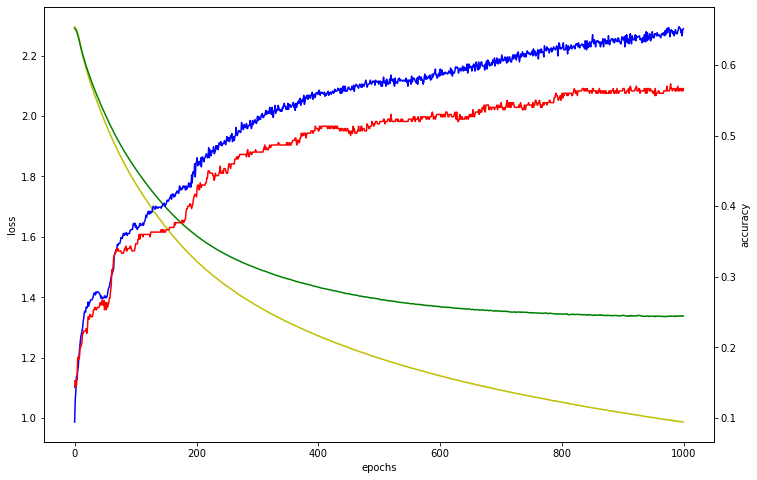

In [45]:
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val_accuracy')
acc_ax.set_ylabel('accuracy')

In [50]:
#모델 평가하기
loass_and_metrics = model.evaluate(X_test,Y_test,batch_size=100)

100/100 [==============================] - 0s 784us/step - loss: 1.3072 - accuracy: 0.5470


In [52]:
print('loss : ', loass_and_metrics[0])
print('acc : ', loass_and_metrics[1])


loss :  1.3072490692138672
acc :  0.546999990940094


In [53]:
model.save('model/mnist.h5')

In [56]:
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 1570      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


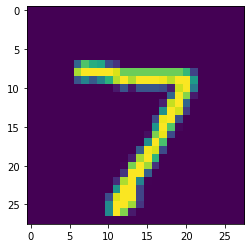

In [58]:
plt.imshow(X_test[0].reshape(28,28))

In [67]:
# 6. 모델 사용하기(예측)
print((model2.predict(X_test[0].reshape(1,784))).argmax())
print(Y_test[0].argmax())

7
7


## 2.  콜백함수1

In [68]:
import tensorflow as tf
class CustomHistory(tf.keras.callbacks.Callback): #on_epoch_end()
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50==0:
            print("epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}".\
                 format(self.epoch, logs.get('loss'), logs.get('accuracy'), logs.get('val_loss'), logs.get('val_accuracy')))
# data set
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()
# 훈련 검증 셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 정수 -> 실수형 변환 -> normalize하기(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000,784).astype('float32') / 255.0
X_test = X_test.reshape(10000,784).astype('float32') / 255.0
#700개 get
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs = np.random.choice(10000,300)
X_train=X_train[train_rand_idxs]
Y_train=Y_train[train_rand_idxs]
X_val=X_val[val_rand_idxs]
Y_val=Y_val[val_rand_idxs]
# 원핫인코딩
Y_train=utils.to_categorical(Y_train)
Y_val=utils.to_categorical(Y_val)
Y_test=utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습시키기
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=100, validation_data=(X_val, Y_val), callbacks=[customHistory])

Epoch 1/1000
7/7 [==============================] - 0s 18ms/step - loss: 2.2949 - accuracy: 0.0886 - val_loss: 2.2841 - val_accuracy: 0.1567
Epoch 2/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2784 - accuracy: 0.1329 - val_loss: 2.2729 - val_accuracy: 0.1567
Epoch 3/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2676 - accuracy: 0.1571 - val_loss: 2.2649 - val_accuracy: 0.1700
Epoch 4/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2595 - accuracy: 0.1686 - val_loss: 2.2580 - val_accuracy: 0.1733
Epoch 5/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2524 - accuracy: 0.1743 - val_loss: 2.2518 - val_accuracy: 0.1833
Epoch 6/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2461 - accuracy: 0.1857 - val_loss: 2.2459 - val_accuracy: 0.1833
Epoch 7/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2396 - accuracy: 0.1929 - val_loss: 2.2401 - val_accuracy: 0.1833
Epoch 8/1000
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 1.7822 - accuracy: 0.3414 - val_loss: 1.8356 - val_accuracy: 0.3133
Epoch 116/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7799 - accuracy: 0.3414 - val_loss: 1.8334 - val_accuracy: 0.3200
Epoch 117/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7772 - accuracy: 0.3471 - val_loss: 1.8312 - val_accuracy: 0.3200
Epoch 118/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7748 - accuracy: 0.3471 - val_loss: 1.8290 - val_accuracy: 0.3233
Epoch 119/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7722 - accuracy: 0.3486 - val_loss: 1.8269 - val_accuracy: 0.3233
Epoch 120/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7698 - accuracy: 0.3543 - val_loss: 1.8247 - val_accuracy: 0.3233
Epoch 121/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7673 - accuracy: 0.3514 - val_loss: 1.8225 - val_accuracy: 0.3233
Epoch 122/1000
7/7 [=

Epoch 172/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6586 - accuracy: 0.4100 - val_loss: 1.7333 - val_accuracy: 0.3900
Epoch 173/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6571 - accuracy: 0.4086 - val_loss: 1.7319 - val_accuracy: 0.3933
Epoch 174/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6550 - accuracy: 0.4057 - val_loss: 1.7305 - val_accuracy: 0.3933
Epoch 175/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6533 - accuracy: 0.4171 - val_loss: 1.7290 - val_accuracy: 0.3900
Epoch 176/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6511 - accuracy: 0.4171 - val_loss: 1.7278 - val_accuracy: 0.3867
Epoch 177/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6495 - accuracy: 0.4100 - val_loss: 1.7264 - val_accuracy: 0.3867
Epoch 178/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6476 - accuracy: 0.4143 - val_loss: 1.7251 - val_accuracy: 0.3867
Epoch 

Epoch 229/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5645 - accuracy: 0.4457 - val_loss: 1.6610 - val_accuracy: 0.3967
Epoch 230/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.5629 - accuracy: 0.4471 - val_loss: 1.6600 - val_accuracy: 0.3967
Epoch 231/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5613 - accuracy: 0.4429 - val_loss: 1.6589 - val_accuracy: 0.3967
Epoch 232/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5600 - accuracy: 0.4457 - val_loss: 1.6579 - val_accuracy: 0.3967
Epoch 233/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5581 - accuracy: 0.4471 - val_loss: 1.6567 - val_accuracy: 0.4000
Epoch 234/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5569 - accuracy: 0.4457 - val_loss: 1.6558 - val_accuracy: 0.4000
Epoch 235/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5556 - accuracy: 0.4471 - val_loss: 1.6547 - val_accuracy: 0.4000
Epoch 

Epoch 286/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4863 - accuracy: 0.4729 - val_loss: 1.6029 - val_accuracy: 0.4400
Epoch 287/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4848 - accuracy: 0.4714 - val_loss: 1.6022 - val_accuracy: 0.4400
Epoch 288/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4831 - accuracy: 0.4729 - val_loss: 1.6013 - val_accuracy: 0.4400
Epoch 289/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4823 - accuracy: 0.4700 - val_loss: 1.6003 - val_accuracy: 0.4400
Epoch 290/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4812 - accuracy: 0.4729 - val_loss: 1.5995 - val_accuracy: 0.4400
Epoch 291/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4797 - accuracy: 0.4743 - val_loss: 1.5984 - val_accuracy: 0.4400
Epoch 292/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4784 - accuracy: 0.4729 - val_loss: 1.5976 - val_accuracy: 0.4400
Epoch 

Epoch 343/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4194 - accuracy: 0.5000 - val_loss: 1.5549 - val_accuracy: 0.4400
Epoch 344/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4182 - accuracy: 0.4986 - val_loss: 1.5542 - val_accuracy: 0.4400
Epoch 345/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4170 - accuracy: 0.5014 - val_loss: 1.5531 - val_accuracy: 0.4433
Epoch 346/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4157 - accuracy: 0.5014 - val_loss: 1.5527 - val_accuracy: 0.4433
Epoch 347/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4146 - accuracy: 0.5029 - val_loss: 1.5518 - val_accuracy: 0.4433
Epoch 348/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4137 - accuracy: 0.5029 - val_loss: 1.5512 - val_accuracy: 0.4433
Epoch 349/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4124 - accuracy: 0.5000 - val_loss: 1.5501 - val_accuracy: 0.4467
Epoch 

Epoch 400/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3603 - accuracy: 0.5214 - val_loss: 1.5138 - val_accuracy: 0.4500
epoch:400, loss:1.360333800315857, acc:0.5214285850524902, val_loss:1.5138095617294312, val_acc:0.44999998807907104
Epoch 401/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3594 - accuracy: 0.5186 - val_loss: 1.5125 - val_accuracy: 0.4467
Epoch 402/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3580 - accuracy: 0.5171 - val_loss: 1.5126 - val_accuracy: 0.4500
Epoch 403/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3571 - accuracy: 0.5214 - val_loss: 1.5117 - val_accuracy: 0.4467
Epoch 404/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.3564 - accuracy: 0.5214 - val_loss: 1.5106 - val_accuracy: 0.4467
Epoch 405/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3554 - accuracy: 0.5171 - val_loss: 1.5098 - val_accuracy: 0.4467
Epoch 406/1000
7/7 [============

7/7 [==============================] - 0s 3ms/step - loss: 1.3100 - accuracy: 0.5386 - val_loss: 1.4799 - val_accuracy: 0.4667
Epoch 457/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3096 - accuracy: 0.5357 - val_loss: 1.4787 - val_accuracy: 0.4700
Epoch 458/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3093 - accuracy: 0.5357 - val_loss: 1.4784 - val_accuracy: 0.4700
Epoch 459/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3078 - accuracy: 0.5329 - val_loss: 1.4784 - val_accuracy: 0.4700
Epoch 460/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3071 - accuracy: 0.5371 - val_loss: 1.4775 - val_accuracy: 0.4667
Epoch 461/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3060 - accuracy: 0.5371 - val_loss: 1.4769 - val_accuracy: 0.4700
Epoch 462/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3054 - accuracy: 0.5400 - val_loss: 1.4769 - val_accuracy: 0.4700
Epoch 463/1000
7/7 [=

Epoch 513/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2683 - accuracy: 0.5457 - val_loss: 1.4531 - val_accuracy: 0.4800
Epoch 514/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2666 - accuracy: 0.5486 - val_loss: 1.4528 - val_accuracy: 0.4800
Epoch 515/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2665 - accuracy: 0.5443 - val_loss: 1.4521 - val_accuracy: 0.4833
Epoch 516/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2656 - accuracy: 0.5443 - val_loss: 1.4515 - val_accuracy: 0.4833
Epoch 517/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2647 - accuracy: 0.5471 - val_loss: 1.4514 - val_accuracy: 0.4833
Epoch 518/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2644 - accuracy: 0.5514 - val_loss: 1.4515 - val_accuracy: 0.4800
Epoch 519/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2637 - accuracy: 0.5471 - val_loss: 1.4508 - val_accuracy: 0.4833
Epoch 

Epoch 626/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2001 - accuracy: 0.5586 - val_loss: 1.4200 - val_accuracy: 0.4867
Epoch 627/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.2000 - accuracy: 0.5571 - val_loss: 1.4204 - val_accuracy: 0.4833
Epoch 628/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1995 - accuracy: 0.5600 - val_loss: 1.4201 - val_accuracy: 0.4867
Epoch 629/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1982 - accuracy: 0.5600 - val_loss: 1.4196 - val_accuracy: 0.4900
Epoch 630/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1979 - accuracy: 0.5557 - val_loss: 1.4194 - val_accuracy: 0.4933
Epoch 631/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1975 - accuracy: 0.5543 - val_loss: 1.4195 - val_accuracy: 0.4933
Epoch 632/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1967 - accuracy: 0.5586 - val_loss: 1.4192 - val_accuracy: 0.4967
Epoch 

Epoch 683/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1716 - accuracy: 0.5557 - val_loss: 1.4096 - val_accuracy: 0.4867
Epoch 684/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1712 - accuracy: 0.5529 - val_loss: 1.4086 - val_accuracy: 0.4867
Epoch 685/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1709 - accuracy: 0.5586 - val_loss: 1.4081 - val_accuracy: 0.4900
Epoch 686/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1704 - accuracy: 0.5486 - val_loss: 1.4086 - val_accuracy: 0.4967
Epoch 687/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1699 - accuracy: 0.5586 - val_loss: 1.4089 - val_accuracy: 0.4967
Epoch 688/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1693 - accuracy: 0.5571 - val_loss: 1.4096 - val_accuracy: 0.4900
Epoch 689/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1688 - accuracy: 0.5586 - val_loss: 1.4085 - val_accuracy: 0.4967
Epoch 

Epoch 740/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1460 - accuracy: 0.5657 - val_loss: 1.3996 - val_accuracy: 0.4933
Epoch 741/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1452 - accuracy: 0.5600 - val_loss: 1.3992 - val_accuracy: 0.4900
Epoch 742/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1444 - accuracy: 0.5614 - val_loss: 1.3996 - val_accuracy: 0.4900
Epoch 743/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1443 - accuracy: 0.5586 - val_loss: 1.3997 - val_accuracy: 0.4900
Epoch 744/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1439 - accuracy: 0.5629 - val_loss: 1.3998 - val_accuracy: 0.4900
Epoch 745/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1433 - accuracy: 0.5600 - val_loss: 1.4001 - val_accuracy: 0.4900
Epoch 746/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1430 - accuracy: 0.5614 - val_loss: 1.3996 - val_accuracy: 0.4900
Epoch 

Epoch 797/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1213 - accuracy: 0.5657 - val_loss: 1.3935 - val_accuracy: 0.4933
Epoch 798/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1211 - accuracy: 0.5586 - val_loss: 1.3938 - val_accuracy: 0.4933
Epoch 799/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1205 - accuracy: 0.5629 - val_loss: 1.3930 - val_accuracy: 0.4933
Epoch 800/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1192 - accuracy: 0.5671 - val_loss: 1.3931 - val_accuracy: 0.4933
epoch:800, loss:1.1192374229431152, acc:0.5671428442001343, val_loss:1.3930631875991821, val_acc:0.4933333396911621
Epoch 801/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1195 - accuracy: 0.5614 - val_loss: 1.3939 - val_accuracy: 0.4933
Epoch 802/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.1188 - accuracy: 0.5629 - val_loss: 1.3929 - val_accuracy: 0.4900
Epoch 803/1000
7/7 [============

Epoch 853/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0990 - accuracy: 0.5671 - val_loss: 1.3899 - val_accuracy: 0.4900
Epoch 854/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.0984 - accuracy: 0.5643 - val_loss: 1.3900 - val_accuracy: 0.4900
Epoch 855/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0984 - accuracy: 0.5629 - val_loss: 1.3897 - val_accuracy: 0.4900
Epoch 856/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.0976 - accuracy: 0.5643 - val_loss: 1.3896 - val_accuracy: 0.4900
Epoch 857/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0974 - accuracy: 0.5671 - val_loss: 1.3891 - val_accuracy: 0.4900
Epoch 858/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0973 - accuracy: 0.5614 - val_loss: 1.3907 - val_accuracy: 0.4933
Epoch 859/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.0969 - accuracy: 0.5671 - val_loss: 1.3899 - val_accuracy: 0.4900
Epoch 

Epoch 910/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0777 - accuracy: 0.5714 - val_loss: 1.3875 - val_accuracy: 0.4967
Epoch 911/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0773 - accuracy: 0.5729 - val_loss: 1.3873 - val_accuracy: 0.4967
Epoch 912/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0765 - accuracy: 0.5686 - val_loss: 1.3870 - val_accuracy: 0.4967
Epoch 913/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0768 - accuracy: 0.5800 - val_loss: 1.3862 - val_accuracy: 0.4967
Epoch 914/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0762 - accuracy: 0.5771 - val_loss: 1.3877 - val_accuracy: 0.4967
Epoch 915/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0768 - accuracy: 0.5700 - val_loss: 1.3873 - val_accuracy: 0.4967
Epoch 916/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.0759 - accuracy: 0.5757 - val_loss: 1.3871 - val_accuracy: 0.4967
Epoch 

Text(0, 0.5, 'accuracy')

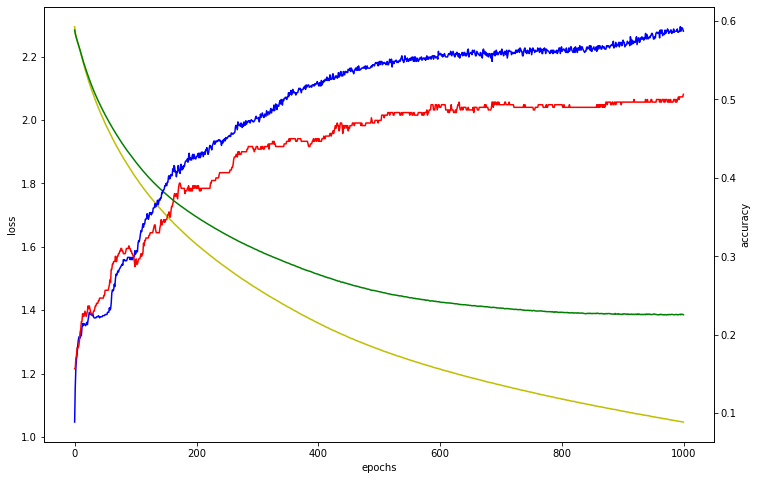

In [69]:
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val_accuracy')
acc_ax.set_ylabel('accuracy')

## 3. 콜백함수2 - Early Stopping
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

In [70]:
# data set
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()
# 훈련 검증 셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 정수 -> 실수형 변환 -> normalize하기(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000,784).astype('float32') / 255.0
X_test = X_test.reshape(10000,784).astype('float32') / 255.0
#700개 get
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs = np.random.choice(10000,300)
X_train=X_train[train_rand_idxs]
Y_train=Y_train[train_rand_idxs]
X_val=X_val[val_rand_idxs]
Y_val=Y_val[val_rand_idxs]
# 원핫인코딩
Y_train=utils.to_categorical(Y_train)
Y_val=utils.to_categorical(Y_val)
Y_test=utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(patience=1) #성급한 조기종료
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=100, validation_data=(X_val, Y_val),callbacks=[earlyStopping])

Epoch 1/1000
7/7 [==============================] - 0s 18ms/step - loss: 2.3276 - accuracy: 0.0914 - val_loss: 2.3198 - val_accuracy: 0.0633
Epoch 2/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.3159 - accuracy: 0.0786 - val_loss: 2.3117 - val_accuracy: 0.0567
Epoch 3/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.3097 - accuracy: 0.0757 - val_loss: 2.3069 - val_accuracy: 0.0533
Epoch 4/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.3059 - accuracy: 0.0757 - val_loss: 2.3031 - val_accuracy: 0.0500
Epoch 5/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.3025 - accuracy: 0.0800 - val_loss: 2.2992 - val_accuracy: 0.0500
Epoch 6/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2992 - accuracy: 0.0843 - val_loss: 2.2955 - val_accuracy: 0.0533
Epoch 7/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2958 - accuracy: 0.0829 - val_loss: 2.2917 - val_accuracy: 0.0567
Epoch 8/1000
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 2.0598 - accuracy: 0.2086 - val_loss: 2.0636 - val_accuracy: 0.1567
Epoch 118/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.0580 - accuracy: 0.2143 - val_loss: 2.0623 - val_accuracy: 0.1600
Epoch 119/1000
7/7 [==============================] - 0s 3ms/step - loss: 2.0564 - accuracy: 0.2143 - val_loss: 2.0609 - val_accuracy: 0.1567
Epoch 120/1000
7/7 [==============================] - 0s 3ms/step - loss: 2.0546 - accuracy: 0.2129 - val_loss: 2.0593 - val_accuracy: 0.1567
Epoch 121/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.0532 - accuracy: 0.2129 - val_loss: 2.0578 - val_accuracy: 0.1567
Epoch 122/1000
7/7 [==============================] - 0s 3ms/step - loss: 2.0513 - accuracy: 0.2143 - val_loss: 2.0563 - val_accuracy: 0.1600
Epoch 123/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.0496 - accuracy: 0.2157 - val_loss: 2.0549 - val_accuracy: 0.1600
Epoch 124/1000
7/7 [=

Epoch 175/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.9286 - accuracy: 0.3186 - val_loss: 1.9510 - val_accuracy: 0.2533
Epoch 176/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.9254 - accuracy: 0.3243 - val_loss: 1.9486 - val_accuracy: 0.2567
Epoch 177/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.9221 - accuracy: 0.3171 - val_loss: 1.9457 - val_accuracy: 0.2533
Epoch 178/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.9186 - accuracy: 0.3157 - val_loss: 1.9430 - val_accuracy: 0.2567
Epoch 179/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.9158 - accuracy: 0.3114 - val_loss: 1.9402 - val_accuracy: 0.2533
Epoch 180/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.9118 - accuracy: 0.3214 - val_loss: 1.9372 - val_accuracy: 0.2533
Epoch 181/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.9084 - accuracy: 0.3143 - val_loss: 1.9340 - val_accuracy: 0.2500
Epoch 

Epoch 233/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7738 - accuracy: 0.3543 - val_loss: 1.8173 - val_accuracy: 0.2867
Epoch 234/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7721 - accuracy: 0.3571 - val_loss: 1.8157 - val_accuracy: 0.2900
Epoch 235/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7702 - accuracy: 0.3557 - val_loss: 1.8141 - val_accuracy: 0.2900
Epoch 236/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.7682 - accuracy: 0.3600 - val_loss: 1.8123 - val_accuracy: 0.3000
Epoch 237/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7663 - accuracy: 0.3571 - val_loss: 1.8109 - val_accuracy: 0.2900
Epoch 238/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.7647 - accuracy: 0.3571 - val_loss: 1.8091 - val_accuracy: 0.3067
Epoch 239/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7628 - accuracy: 0.3586 - val_loss: 1.8079 - val_accuracy: 0.3033
Epoch 

Epoch 291/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6787 - accuracy: 0.4057 - val_loss: 1.7360 - val_accuracy: 0.3667
Epoch 292/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6776 - accuracy: 0.4114 - val_loss: 1.7345 - val_accuracy: 0.3667
Epoch 293/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6760 - accuracy: 0.4086 - val_loss: 1.7333 - val_accuracy: 0.3667
Epoch 294/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6745 - accuracy: 0.4100 - val_loss: 1.7324 - val_accuracy: 0.3733
Epoch 295/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6730 - accuracy: 0.4086 - val_loss: 1.7310 - val_accuracy: 0.3700
Epoch 296/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6719 - accuracy: 0.4114 - val_loss: 1.7300 - val_accuracy: 0.3700
Epoch 297/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6703 - accuracy: 0.4086 - val_loss: 1.7287 - val_accuracy: 0.3667
Epoch 

Epoch 349/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6052 - accuracy: 0.4400 - val_loss: 1.6743 - val_accuracy: 0.3900
Epoch 350/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6040 - accuracy: 0.4443 - val_loss: 1.6733 - val_accuracy: 0.3900
Epoch 351/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6030 - accuracy: 0.4371 - val_loss: 1.6726 - val_accuracy: 0.3900
Epoch 352/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6016 - accuracy: 0.4414 - val_loss: 1.6715 - val_accuracy: 0.3900
Epoch 353/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6009 - accuracy: 0.4429 - val_loss: 1.6710 - val_accuracy: 0.4000
Epoch 354/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.5995 - accuracy: 0.4400 - val_loss: 1.6706 - val_accuracy: 0.4067
Epoch 355/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.5986 - accuracy: 0.4429 - val_loss: 1.6698 - val_accuracy: 0.4067
Epoch 

Text(0, 0.5, 'accuracy')

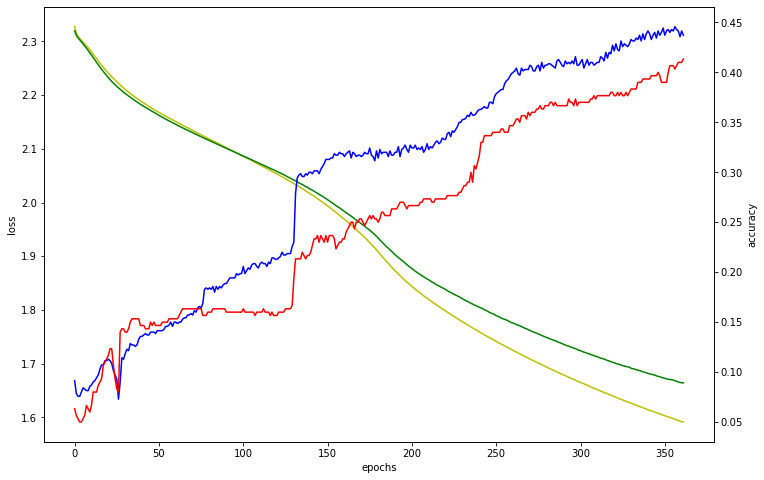

In [71]:
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val_accuracy')
acc_ax.set_ylabel('accuracy')

## 4. 위 모델 (DNN)의 accuracy 늘리기
<ul>
    <li> ★★★★데이터 확보</li>
    <li> ★레이어 </li>
    <li> ★활성화함수 : 은닉층에는 주로 relu, elu, output layer에는 sigmoid(이진분류), softmax(다중분류)</li>
    <li> optimizer, epoch 등을 조정</li>

In [14]:
# data set
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()
# 훈련 검증 셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 정수 -> 실수형 변환 -> normalize하기(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000,784).astype('float32') / 255.0
X_test = X_test.reshape(10000,784).astype('float32') / 255.0
# #700개 get
# train_rand_idxs = np.random.choice(50000,700)
# val_rand_idxs = np.random.choice(10000,300)
# X_train=X_train[train_rand_idxs]
# Y_train=Y_train[train_rand_idxs]
# X_val=X_val[val_rand_idxs]
# Y_val=Y_val[val_rand_idxs]
# 원핫인코딩
Y_train=utils.to_categorical(Y_train)
Y_val=utils.to_categorical(Y_val)
Y_test=utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=1024, input_dim=784, activation='relu'))
model.add(Dense(units=2048, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(patience=400)
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=100, validation_data=(X_val, Y_val),callbacks=[earlyStopping])

Epoch 1/1000
500/500 [==============================] - 12s 23ms/step - loss: 1.0370 - accuracy: 0.7450 - val_loss: 0.3987 - val_accuracy: 0.8940
Epoch 2/1000
500/500 [==============================] - 11s 23ms/step - loss: 0.3631 - accuracy: 0.8976 - val_loss: 0.2878 - val_accuracy: 0.9174
Epoch 3/1000
500/500 [==============================] - 12s 24ms/step - loss: 0.2863 - accuracy: 0.9181 - val_loss: 0.2486 - val_accuracy: 0.9280
Epoch 4/1000
500/500 [==============================] - 11s 23ms/step - loss: 0.2463 - accuracy: 0.9292 - val_loss: 0.2206 - val_accuracy: 0.9373
Epoch 5/1000
500/500 [==============================] - 11s 23ms/step - loss: 0.2167 - accuracy: 0.9374 - val_loss: 0.1965 - val_accuracy: 0.9441
Epoch 6/1000
276/500 [===============>..............] - ETA: 4s - loss: 0.1948 - accuracy: 0.9460

KeyboardInterrupt: 